# Predicting the Sale Price of Bulldozer using Machine Learning

### 1. Problem Definition

How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

### 2. Data

Kaggle dataset - https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

1. **Traiin.csv** - Historical bulldozer sales examples up to 2011
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to Nov 2012

### 3. Evaluation

Root Mean Squared Log Error (RMSLE)

### 4. Importing the data and preparing it for modelling

In [3]:
# Import data analysis tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Import training and validation set

path = '/content/TrainAndValid.csv'
df = pd.read_csv(path, error_bad_lines=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121.0,3.0,2004.0,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121.0,3.0,1996.0,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121.0,3.0,2001.0,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121.0,3.0,2001.0,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121.0,3.0,2007.0,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(10648, 53)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10648 entries, 0 to 10647
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   10648 non-null  int64  
 1   SalePrice                 10648 non-null  int64  
 2   MachineID                 10648 non-null  int64  
 3   ModelID                   10648 non-null  int64  
 4   datasource                10647 non-null  float64
 5   auctioneerID              10647 non-null  float64
 6   YearMade                  10647 non-null  float64
 7   MachineHoursCurrentMeter  10647 non-null  float64
 8   UsageBand                 9298 non-null   object 
 9   saledate                  10647 non-null  object 
 10  fiModelDesc               10647 non-null  object 
 11  fiBaseModel               10647 non-null  object 
 12  fiSecondaryDesc           6942 non-null   object 
 13  fiModelSeries             1461 non-null   object 
 14  fiMode

In [7]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      1
auctioneerID                    1
YearMade                        1
MachineHoursCurrentMeter        1
UsageBand                    1350
saledate                        1
fiModelDesc                     1
fiBaseModel                     1
fiSecondaryDesc              3706
fiModelSeries                9187
fiModelDescriptor            8063
ProductSize                  5743
fiProductClassDesc              1
state                           1
ProductGroup                    1
ProductGroupDesc                1
Drive_System                 8229
Enclosure                       7
Forks                        5250
Pad_Type                     8837
Ride_Control                 7101
Stick                        8837
Transmission                 6420
Turbocharged                 8837
Blade_Extension             10042
Blade_Width   

In [8]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

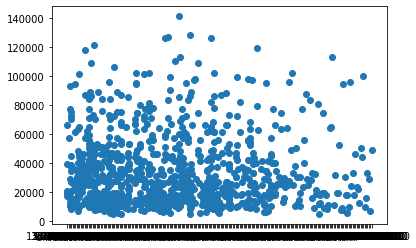

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [10]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [11]:
df.saledate.dtype

dtype('O')

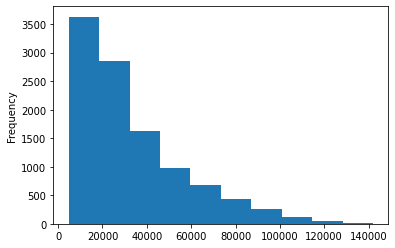

In [12]:
df.SalePrice.plot.hist()

### Parsing dates

In [13]:
# Importing data again but this time parse date

df = pd.read_csv(path, low_memory=False, parse_dates=['saledate'])

In [14]:
df.saledate.dtype

dtype('<M8[ns]')

In [15]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

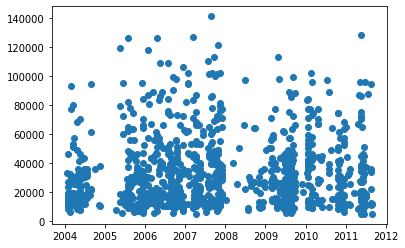

In [16]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [17]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [19]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

In [21]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head()

7648   2004-01-05
8228   2004-01-09
6770   2004-01-16
4051   2004-01-19
5086   2004-01-20
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe

In [22]:
df_tmp = df.copy()

### Add datatime parameters for the saledate column

In [23]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDatOfYear'] = df_tmp['saledate'].dt.dayofyear

In [25]:
df_tmp.head().T

,7648,8228,6770,4051,5086
SalesID,1165000,1166933,1162057,1152803,1156368
SalePrice,27000,10750,35000,30000,19000
MachineID,733687,1035166,1060038,1000789,1060567
ModelID,7057,8861,4763,12263,3822
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1995,2002,1999,1998,1990
MachineHoursCurrentMeter,4368,603,479,4302,0
UsageBand,Medium,Low,Low,Medium,NaN
saledate,2004-01-05 00:00:00,2004-01-09 00:00:00,2004-01-16 00:00:00,2004-01-19 00:00:00,2004-01-20 00:00:00


In [26]:
# remove saledate

df_tmp.drop(columns=['saledate'], inplace=True, axis=1)

In [27]:
df_tmp.state.value_counts()

Texas             1677
Florida           1599
California        1013
Georgia            851
North Carolina     720
Louisiana          527
Alabama            470
Ohio               379
Illinois           375
West Virginia      334
Pennsylvania       319
Arizona            310
Missouri           302
Virginia           298
Tennessee          296
Michigan           284
Colorado           281
Nevada             267
New York           254
South Carolina     250
Utah               242
Kentucky           217
Oklahoma           212
Indiana            209
Mississippi        181
New Jersey         177
Maryland           174
Wisconsin          171
Minnesota          165
Washington         165
Arkansas           161
Kansas             153
Oregon             147
Iowa               130
Idaho              122
New Mexico         102
Wyoming             97
Massachusetts       94
North Dakota        60
New Hampshire       59
Delaware            54
South Dakota        51
Maine               45
Hawaii     

In [28]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDatOfYear
7648,1165000,27000,733687,7057,121,3,1995,4368,Medium,312,...,NaN,NaN,NaN,NaN,NaN,2004,1,5,0,5
8228,1166933,10750,1035166,8861,121,3,2002,603,Low,803,...,NaN,NaN,NaN,NaN,NaN,2004,1,9,4,9
6770,1162057,35000,1060038,4763,121,3,1999,479,Low,650G,...,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN,2004,1,16,4,16
4051,1152803,30000,1000789,12263,121,3,1998,4302,Medium,SE280LC-2,...,NaN,NaN,NaN,NaN,NaN,2004,1,19,0,19
5086,1156368,19000,1060567,3822,121,3,1990,0,NaN,950E,...,NaN,NaN,NaN,Standard,Conventional,2004,1,20,1,20


In [29]:
len(df_tmp)

14180

### 5. Modelling

Some model driven EDA

In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
#model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

ValueError: ignored

In [32]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14180 entries, 7648 to 10012
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SalesID                   14180 non-null  int64 
 1   SalePrice                 14180 non-null  int64 
 2   MachineID                 14180 non-null  int64 
 3   ModelID                   14180 non-null  int64 
 4   datasource                14180 non-null  int64 
 5   auctioneerID              14180 non-null  int64 
 6   YearMade                  14180 non-null  int64 
 7   MachineHoursCurrentMeter  14180 non-null  int64 
 8   UsageBand                 12428 non-null  object
 9   fiModelDesc               14180 non-null  object
 10  fiBaseModel               14180 non-null  object
 11  fiSecondaryDesc           9177 non-null   object
 12  fiModelSeries             2051 non-null   object
 13  fiModelDescriptor         3498 non-null   object
 14  ProductSize        

In [34]:
df_tmp['UsageBand'].dtype

dtype('O')

In [35]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter        0
UsageBand                    1752
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              5003
fiModelSeries               12129
fiModelDescriptor           10682
ProductSize                  7461
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                11067
Enclosure                       7
Forks                        7109
Pad_Type                    11879
Ride_Control                 9589
Stick                       11879
Transmission                 8706
Turbocharged                11879
Blade_Extension             13371
Blade_Width                 13371
Enclosure_Type

### Convert string to categories

In [36]:
df_tmp.head().T

,7648,8228,6770,4051,5086
SalesID,1165000,1166933,1162057,1152803,1156368
SalePrice,27000,10750,35000,30000,19000
MachineID,733687,1035166,1060038,1000789,1060567
ModelID,7057,8861,4763,12263,3822
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1995,2002,1999,1998,1990
MachineHoursCurrentMeter,4368,603,479,4302,0
UsageBand,Medium,Low,Low,Medium,NaN
fiModelDesc,312,803,650G,SE280LC-2,950E


In [37]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

True

In [38]:
# Find columns which contain strings

for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [39]:
# Turn string values into category values

for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()


In [40]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14180 entries, 7648 to 10012
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   14180 non-null  int64   
 1   SalePrice                 14180 non-null  int64   
 2   MachineID                 14180 non-null  int64   
 3   ModelID                   14180 non-null  int64   
 4   datasource                14180 non-null  int64   
 5   auctioneerID              14180 non-null  int64   
 6   YearMade                  14180 non-null  int64   
 7   MachineHoursCurrentMeter  14180 non-null  int64   
 8   UsageBand                 12428 non-null  category
 9   fiModelDesc               14180 non-null  category
 10  fiBaseModel               14180 non-null  category
 11  fiSecondaryDesc           9177 non-null   category
 12  fiModelSeries             2051 non-null   category
 13  fiModelDescriptor         3498 non-null   c

In [41]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [42]:
df_tmp.state.cat.codes

7648     31
8228      9
6770      0
4051     42
5086     42
         ..
10026     3
10016     8
10015     2
9996      0
10012    16
Length: 14180, dtype: int8

In [43]:
# Check missing data %

df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.000000
UsageBand                   0.123554
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.352821
fiModelSeries               0.855360
fiModelDescriptor           0.753315
ProductSize                 0.526164
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.780465
Enclosure                   0.000494
Forks                       0.501340
Pad_Type                    0.837729
Ride_Control                0.676234
Stick                       0.837729
Transmission                0.613963
Turbocharged                0.837729
B

### Save processed data

In [44]:
# df_tmp.to_csv('train.csv', index=False)

### Fill missing values